In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Загрузим уже обработанные в прошлом ДЗ данные!

In [2]:
df = pd.read_csv('processed_sigma.csv')
df = df.drop("Trip_ID", axis=1)

X = df.drop("Surge_Pricing_Type", axis=1)
y = df["Surge_Pricing_Type"]

### Principal component analysis (PCA)

**Задание 1.** Спроецируйте данные на двумерную плоскость, используя `PCA`. Другими словами, выделите первые две главные компоненты и изобразите данные в осях этих компонент. Не забудьте центрировать признаки перед применением метода. 

**Какую долю изначальной дисперсии (информации) содержат/объясняют в себе обе компоненты?** Для этого воспользуйтесь атрибутом `explained_variance_ratio_` у PCA-класса.

In [3]:
### Центрируем данные

### Your code is here

X_centered = X - X.mean()

In [4]:
from sklearn.decomposition import PCA

### Your code is here
pca = PCA(n_components=2)

PCA_dataset = pca.fit_transform(X_centered)

PCA_dataset = pd.DataFrame(PCA_dataset, columns=['PCA_1', 'PCA_2'])
print(pca.explained_variance_ratio_)
PCA_dataset.head()


[0.63176117 0.21129863]


,PCA_1,PCA_2
0,-38.743132,-23.282634
1,-13.209252,-25.023815
2,-2.004910,-1.637085
3,17.178458,-0.907657
4,14.477389,-11.656752


**Задание 2.** Изобразите heatmap корреляции изначальных признаков с новыми двумя главными компонентами. \
**Какие признаки коррелируют с первой компонентой? Какие со второй? В качестве порогового значения договоримся о корреляции >= 0.5 по абсолютному значению **


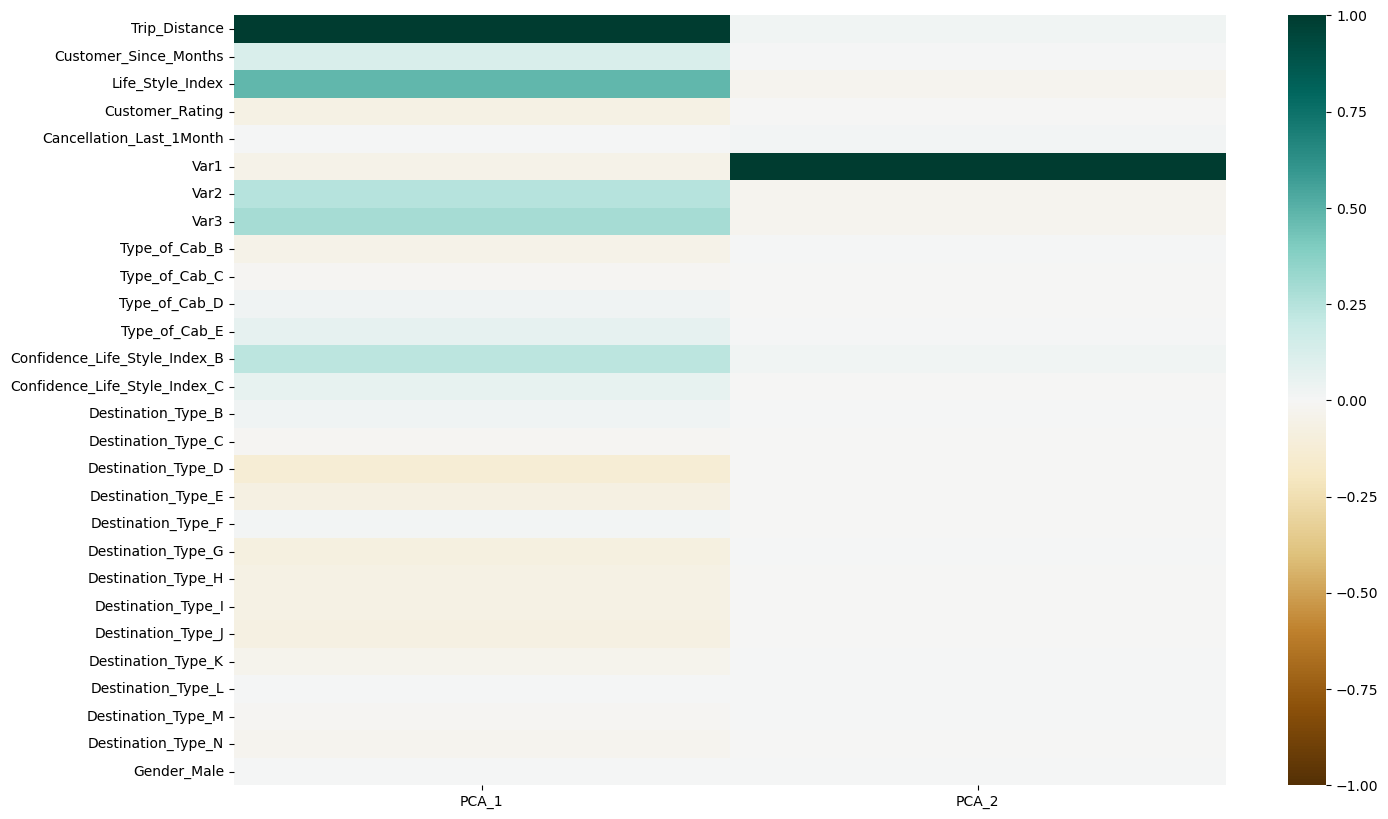

In [5]:

### Your code is here
import seaborn as sns

first_component_corr = X_centered.corrwith(PCA_dataset.PCA_1)
second_component_corr = X_centered.corrwith(PCA_dataset.PCA_2)


corrs = pd.concat((first_component_corr, second_component_corr),
                  axis=1)

corrs.columns = ['PCA_1', 'PCA_2']

fig = plt.figure()

fig.set_size_inches(16, 10)

sns.heatmap(corrs, 
            xticklabels=corrs.columns,
            yticklabels=corrs.index,
            cmap='BrBG',
            vmin=-1,
            vmax=1)

plt.show()


**Задание 3.** Изобразите двумерную проекцию данных с метками классов. Выделите третью главную компоненту и аналогично нарисуйте трехмерную проекцию с метками классов. \
**Какие признаки коррелируют с третьей компонентой?**

<Axes: xlabel='PCA1', ylabel='PCA2'>

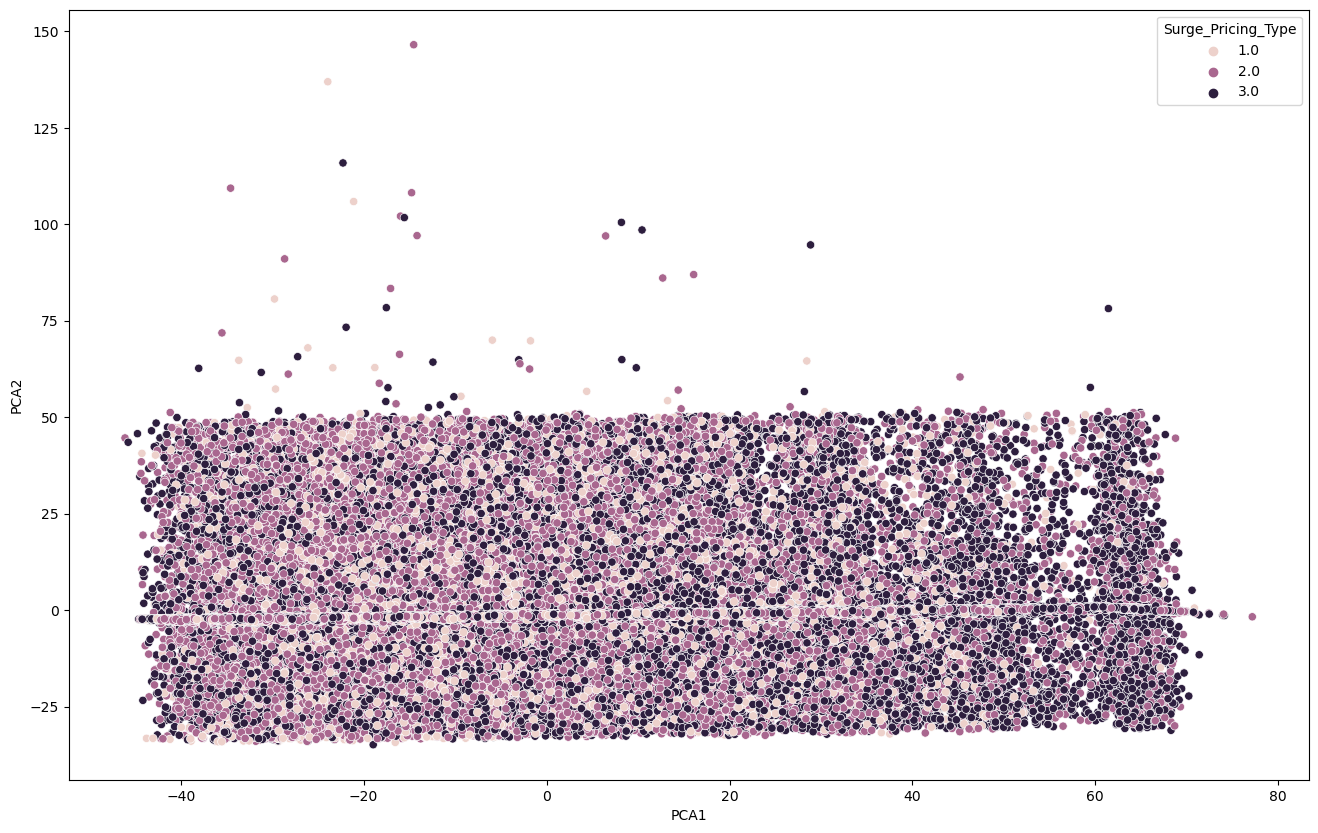

In [6]:
### Your code is here
PCA_dataset = np.concatenate((PCA_dataset.values, y.values.reshape(-1, 1)),
                              axis=1)

PCA_dataset = pd.DataFrame(PCA_dataset, columns=['PCA1', 'PCA2', 'Surge_Pricing_Type'])

import seaborn as sns

fig = plt.figure()
fig.set_size_inches(16, 10)
    
sns.scatterplot(data=PCA_dataset, x="PCA1", y="PCA2", hue="Surge_Pricing_Type")



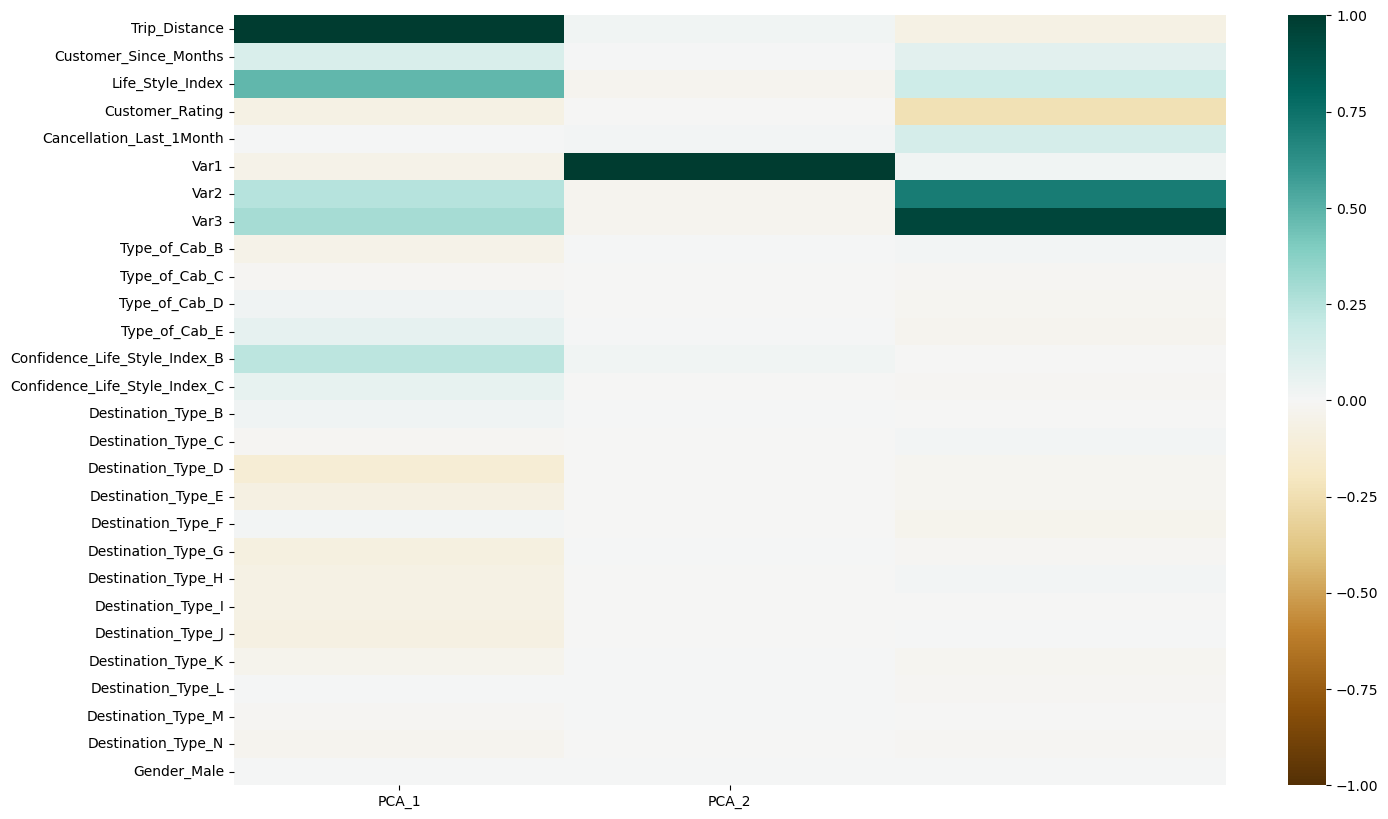

In [7]:
pca_3d = PCA(n_components=3)

pca_3d.fit(X_centered)

PCA_dataset_3d = pca_3d.transform(X_centered)

PCA_dataset_3d = pd.DataFrame(PCA_dataset_3d, columns=['PCA_1', 'PCA_2', 'PCA_3'])

PCA_dataset_3d.head()

first_component_corr_3d = X_centered.corrwith(PCA_dataset_3d.PCA_1)
second_component_corr_3d = X_centered.corrwith(PCA_dataset_3d.PCA_2)
third_component_corr_3d = X_centered.corrwith(PCA_dataset_3d.PCA_3)

corrs_3d = pd.concat((first_component_corr_3d, 
                      second_component_corr_3d, 
                      third_component_corr_3d), axis=1)

corrs_3d.columns = ['PCA_1', 'PCA_2', 'PCA_3']

fig = plt.figure()

fig.set_size_inches(16, 10)

sns.heatmap(corrs_3d, 
            xticklabels=corrs.columns,
            yticklabels=corrs.index,
            cmap='BrBG',
            vmin=-1,
            vmax=1)

plt.show()



In [8]:

PCA_dataset_3d = np.concatenate((PCA_dataset_3d.values, y.values.reshape(-1, 1)),
                                 axis=1)

PCA_dataset_3d = pd.DataFrame(PCA_dataset_3d, columns=['PCA_1', 'PCA_2', 'PCA_3', 'Surge_Pricing_Type'])

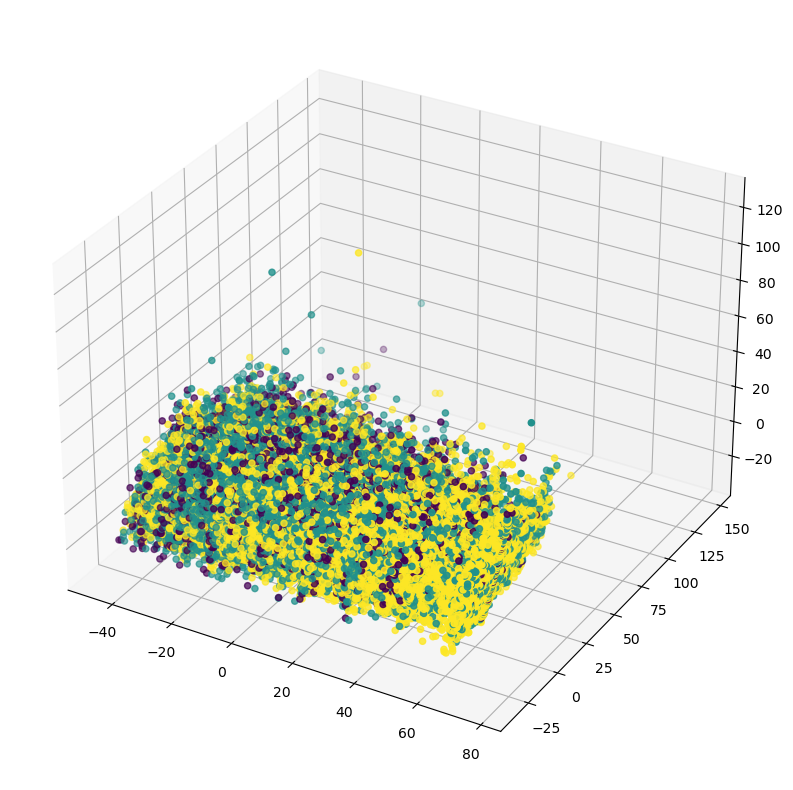

In [9]:

fig = plt.figure()
fig.set_size_inches(16, 10)

ax = plt.axes(projection='3d')

colors = PCA_dataset_3d['Surge_Pricing_Type'].replace(['A', 'B', 'C'],
                                            ['orange', 'green', 'red'])

ax.scatter3D(PCA_dataset_3d['PCA_1'], 
             PCA_dataset_3d['PCA_2'],
             PCA_dataset_3d['PCA_3'], 
             c=colors)

Советуем еще и замерить попарные корреляции между главными компонентами! Это поможет в ответе на один из тестовых вопросов.

--------------------


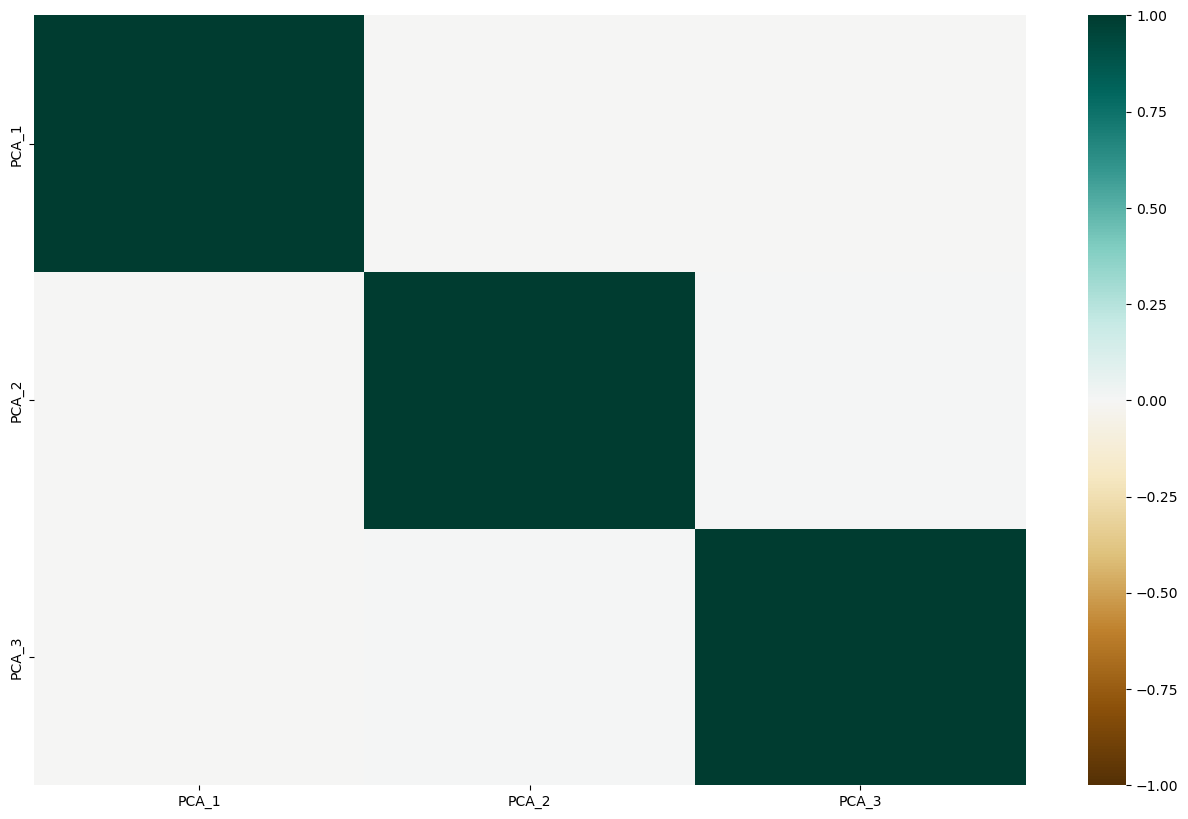

In [23]:
### Your code is here
pca_3d = PCA(n_components=3)

pca_3d.fit(X_centered)

PCA_dataset_3d = pca_3d.transform(X_centered)

PCA_dataset_3d = pd.DataFrame(PCA_dataset_3d, columns=['PCA_1', 'PCA_2', 'PCA_3'])

columns=['PCA_1', 'PCA_2', 'PCA_3']

PCA_dataset_3d.head()

print('--------------------')
fig = plt.figure()

fig.set_size_inches(16, 10)

sns.heatmap(PCA_dataset_3d.corr(), 
            xticklabels=PCA_dataset_3d.columns,
            yticklabels=PCA_dataset_3d.columns,
            cmap='BrBG',
            vmin=-1,
            vmax=1)

plt.show()




In [24]:
PCA_dataset_3d.corr()

,PCA_1,PCA_2,PCA_3
PCA_1,1.000000e+00,-3.155385e-16,-4.898235e-15
PCA_2,-3.155385e-16,1.000000e+00,8.912741e-15
PCA_3,-4.898235e-15,8.912741e-15,1.000000e+00


**Задание 4.** Обучите логистическую регрессию на первых двух компонентах центрированных данных и подберите гиперпараметры. Обучите логистическую регрессию на центрированных данных и подберите гиперпараметры. **Сравните метрику accuracy и f1-score на тестовой выборке в двух моделях**.

P.S. для удобства, скорости и нормализации данных (понадобится, так как захотим повалидироваться на параметрах регуляризации) можно построить конструкцию Pipeline c 3 следующими степами: StandardScaler -> PCA -> LogisticRegression

In [10]:
np.random.seed(2022)
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X_centered, y, test_size=0.2, 
                                                    shuffle=True, random_state=2022)

In [15]:
### Your code is here

pipe = Pipeline([('scaler', StandardScaler()),
                 ('pca', PCA(n_components=2)),
                 ('model', LogisticRegression())])

param_grid = {'model__penalty': ['l1', 'l2', 'elasticnet'],
              'model__C': [1e-5, 0.0001, 0.001, 0.01]}

search_PCA = GridSearchCV(pipe, param_grid=param_grid)

search_PCA.fit(X_train, y_train)

print(f"Best parameter PCA (CV score={search_PCA.best_score_:.5f}):")
print(search_PCA.best_params_)


pipe_logreg = Pipeline([('scaler', StandardScaler()),
                        ('model', LogisticRegression())])

search = GridSearchCV(pipe_logreg, param_grid=param_grid)

search.fit(X_train, y_train)

print(f"Best parameter log_reg (CV score={search.best_score_:.5f}):")
print(search.best_params_)


from sklearn.metrics import classification_report
print(f"PCA report: \n {classification_report(y_test, search_PCA.predict(X_test), digits=3)}")

print(f"Logreg report: \n {classification_report(y_test, search.predict(X_test), digits=3)}")

Best parameter PCA (CV score=0.48086):
{'model__C': 0.0001, 'model__penalty': 'l2'}
Best parameter log_reg (CV score=0.68039):
{'model__C': 0.001, 'model__penalty': 'l2'}
PCA report: 
               precision    recall  f1-score   support

           1      0.000     0.000     0.000      5372
           2      0.479     0.691     0.566     11349
           3      0.494     0.512     0.503      9612

    accuracy                          0.484     26333
   macro avg      0.324     0.401     0.356     26333
weighted avg      0.387     0.484     0.427     26333

Logreg report: 
               precision    recall  f1-score   support

           1      0.746     0.532     0.621      5372
           2      0.636     0.830     0.720     11349
           3      0.736     0.589     0.655      9612

    accuracy                          0.681     26333
   macro avg      0.706     0.650     0.665     26333
weighted avg      0.695     0.681     0.676     26333



Кажется, достаточно сильно теряем в качестве! Может, добавить компонент?

**Задание 5.** Обучите модели логистической регресии на нескольких различных компонентах: [2, 4, 8, 16, 28]. **Нарисуйте графики зависимости accuracy, f1-score от количества компонент. Введите их значения через запятую**. При обучении используйте l2-регуляризацию, гиперпараметр C подбирайте по сетке. 


In [18]:
### Чтобы не заставлять вас писать похожий на предыдущий код,
### Написали функцию, которая будет обучать модель для
### произвольного числа n_components главных компонент.

def train_pca_i(n_components, X_train, y_train):
    pipe = Pipeline([('scaler', StandardScaler()), 
                     ('pca', PCA(n_components=n_components)),
                     ('model', LogisticRegression(penalty='l2', solver='saga',random_state=1))])
    
    param_grid = {'model__C': [0.0001, 0.001, 0.01, 0.1]}
    
    grid = GridSearchCV(pipe, param_grid, cv=5)
    grid.fit(X_train, y_train)
    
    report = classification_report(y_test, grid.predict(X_test), output_dict=True)
    return (round(report['accuracy'], 3), 
            round(report['weighted avg']['f1-score'], 3))

In [27]:
%%time
accuracy_dict, f1_score_dict = {}, {}
components_list = [2, 4, 8, 16, 28]

for n_components in components_list:
    
    ### Your code is here
    res = train_pca_i(n_components, X_train, y_train)
    accuracy_dict[n_components] = res[0]
    f1_score_dict[n_components] = res[1]
    print(f"Number of components: {n_components} \nReport: \n {res}")



Number of components: 2 
Report: 
 (0.486, 0.428)
Number of components: 4 
Report: 
 (0.529, 0.469)
Number of components: 8 
Report: 
 (0.588, 0.525)
Number of components: 16 
Report: 
 (0.592, 0.528)
Number of components: 28 
Report: 
 (0.681, 0.676)
CPU times: user 3min 58s, sys: 18.3 s, total: 4min 16s
Wall time: 1min 59s


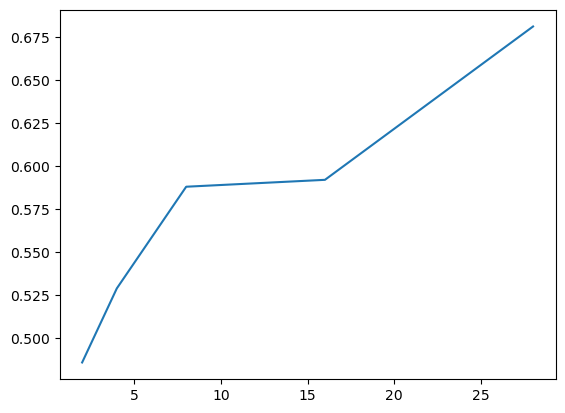

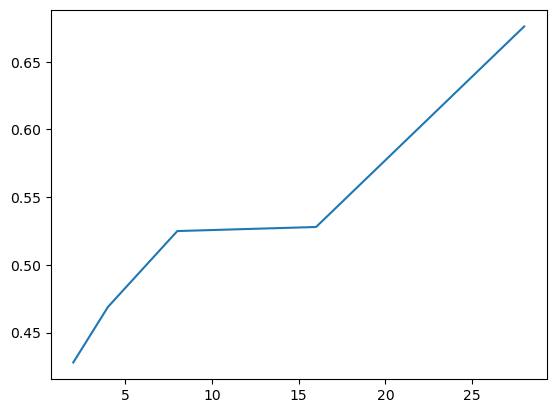

In [28]:
fig_1 = plt.figure()
fig.set_size_inches(16, 10)

plt.plot(components_list, [accuracy_dict[i] for i in components_list] )


fig_2 = plt.figure()
fig.set_size_inches(16, 10)

plt.plot(components_list, [f1_score_dict[i] for i in components_list] )

Обычно, когда решается какая-то высокоразмерная предсказательная задача, где тысячи признаков, функция качества PCA моделей похожа на параболу ветвями вниз в зависимости от количества компонент (для совсем маленьких и больших n_component качество маленькое, при этом есть где-то промежуточное значение).

Как думаете, почему здесь у нас непрерывно растущие графики качества?

Может, изначальные признаки были слишком хороши?

### t-SNE

Напомним, что метод заключается в введении некоторых функций, основанных на расстоянии между признаками, которые измеряют близость объектов. Функций, как вы помните, две, и они заданы в исходном и новом пространствах соотвественно. Далее минимизируем дивергенцию Кульбака-Лейблера по координатaм в новом пространстве

**Задание 6.** Обучите t-sne c `n_components=2` на изначальных данных и визуализируйте результаты с учетом известных классов. 

P.S. если устанете ждать обучения TSNE, или упадет ошибка по типу oom, то можно сократить число объектов в датасете до, например, пары тысяч. Это и следующее задания никак проверяться системой не будут. Вам достаточно повторить упражнение с практики и получить какое-то более адекватное (по сравнению с PCA) изображение классов.

<Axes: xlabel='TSNE1', ylabel='TSNE2'>

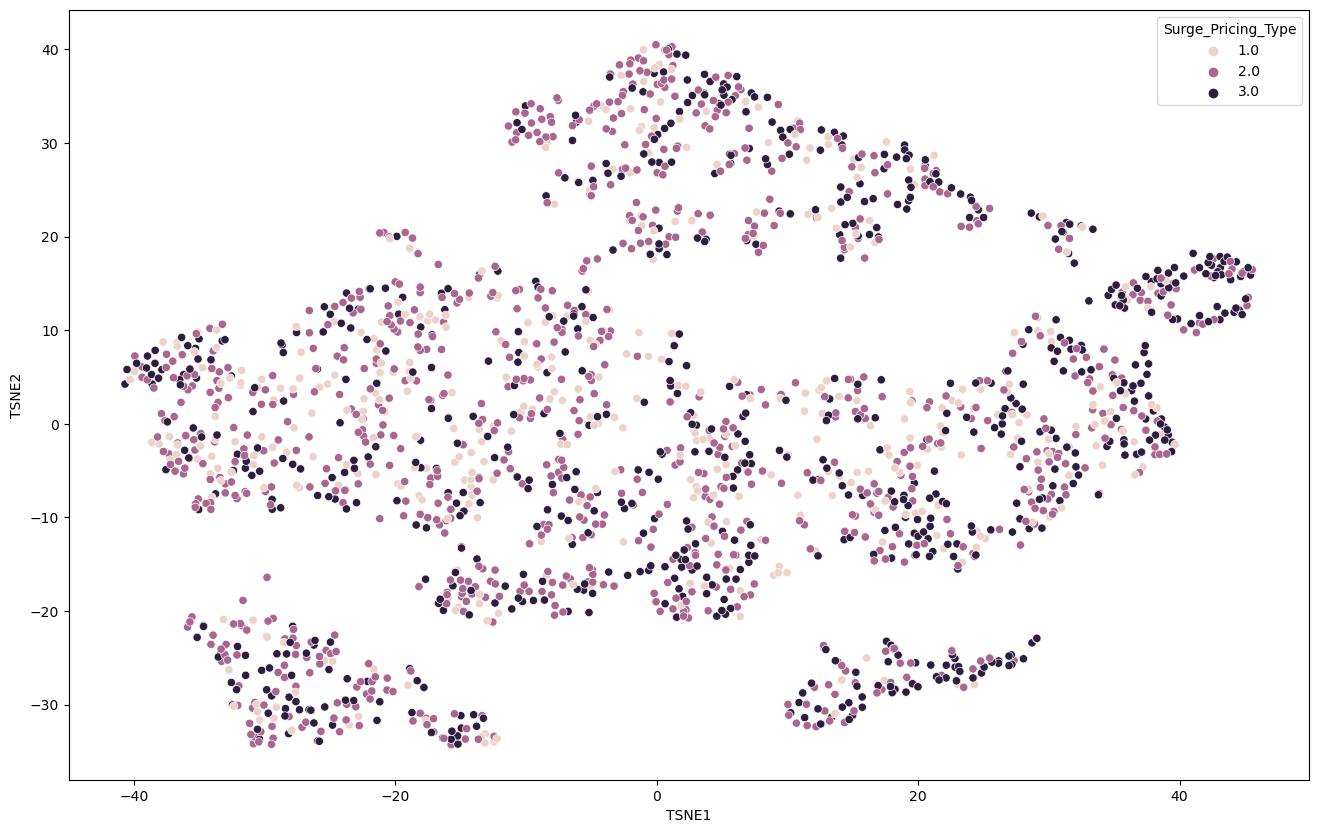

In [38]:
from sklearn.manifold import TSNE

### Your code is here

X_tsne = X_centered[:2000][:]

tsne = TSNE(n_components= 2, perplexity= 45)

res_tsne = tsne.fit_transform(X_tsne)

res_tsne = pd.DataFrame(res_tsne, columns=['TSNE1', 'TSNE2'])

res_tsne = np.concatenate((res_tsne.values, y.values.reshape(-1, 1)[:2000]),
                              axis=1)

res_tsne = pd.DataFrame(res_tsne, columns=['TSNE1', 'TSNE2', 'Surge_Pricing_Type'])

res_tsne.head()

fig = plt.figure()
fig.set_size_inches(16, 10)

sns.scatterplot(data=res_tsne, x="TSNE1", y="TSNE2", hue="Surge_Pricing_Type")



**Задание 7.** Обучите t-sne с `n_components=3` на изначальных данных и визуализируйте результаты с учетом известных классов.

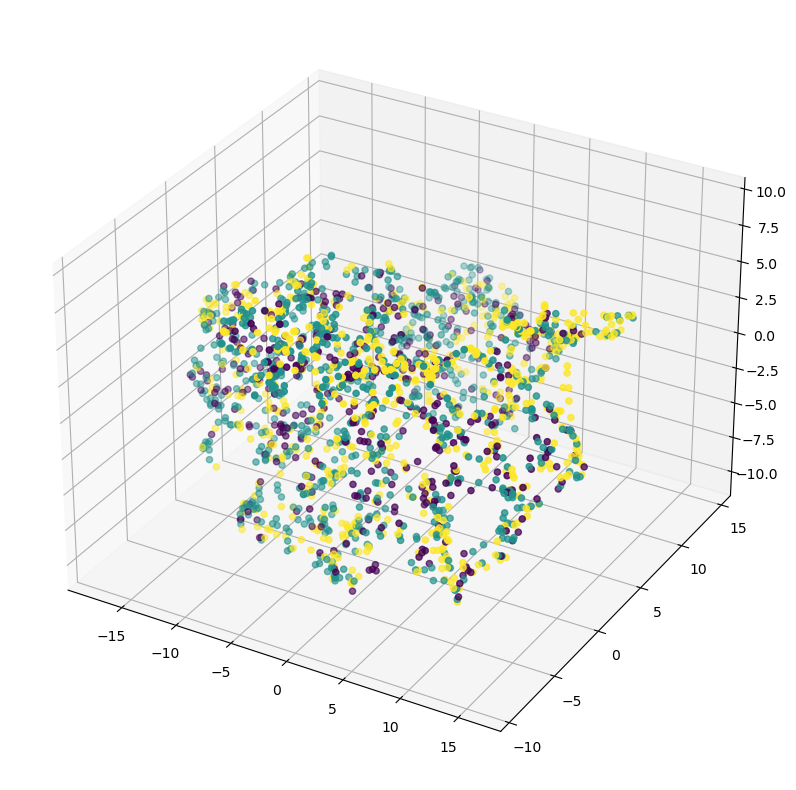

In [35]:
### Your code is here
X_tsne = X_centered[:2000][:]

tsne = TSNE(n_components=3)

res_tsne = tsne.fit_transform(X_tsne)

res_tsne = pd.DataFrame(res_tsne, columns=['TSNE1', 'TSNE2', 'TSNE3'])

res_tsne = np.concatenate((res_tsne.values, y.values.reshape(-1, 1)[:2000]),
                              axis=1)

res_tsne = pd.DataFrame(res_tsne, columns=['TSNE1', 'TSNE2', 'TSNE3', 'Surge_Pricing_Type'])

res_tsne.head()

fig = plt.figure()
fig.set_size_inches(16, 10)

ax = plt.axes(projection='3d')

                                           
colors = res_tsne['Surge_Pricing_Type'].replace(['A', 'B', 'C'],
                                            ['orange', 'green', 'red'])

ax.scatter3D(res_tsne['TSNE1'], 
             res_tsne['TSNE2'],
             res_tsne['TSNE3'], 
             c=colors)


Советуем обрезать датасет до маленького числа объектов (чтобы точки и их группки были хорошо различимы) и поиграться с гиперпараметрами класса Tsne! Обычно такая "игра" может привести к куда более красивым результатам по сравнению с теми, что получены с дефолтными настройками!